### ЛР3 Голубев Сергей ИУ5-65Б

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# чтение обучающей выборки
data = pd.read_csv('heart.csv')

In [6]:
# уберем непонятный для нас параметр, чтобы он не помешал в будущем
data.drop([], axis = 1, inplace = True)

In [7]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
data = data.fillna(1)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
parts = np.split(data, [4,5], axis=1)
X = parts[0]
Y = parts[1]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

     age  sex   cp  trtbps
0  63.0  1.0  3.0   145.0
1  37.0  1.0  2.0   130.0
2  41.0  0.0  1.0   130.0
3  56.0  1.0  1.0   120.0
4  57.0  0.0  0.0   120.0 

Выходные данные:

     chol
0  233.0
1  250.0
2  204.0
3  236.0
4  354.0


## Разделение выборки

In [10]:
 X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, test_size=0.03)

In [11]:
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       age  sex   cp  trtbps
256  58.0  1.0  0.0   128.0
16   58.0  0.0  2.0   120.0
159  56.0  1.0  1.0   130.0
152  64.0  1.0  3.0   170.0
277  57.0  1.0  1.0   124.0 

Входные параметры тестовой выборки:

       age  sex   cp  trtbps
280  42.0  1.0  0.0   136.0
234  70.0  1.0  0.0   130.0
187  54.0  1.0  0.0   124.0
146  44.0  0.0  2.0   118.0
117  56.0  1.0  3.0   120.0 

Выходные параметры обучающей выборки:

       chol
256  259.0
16   340.0
159  221.0
152  227.0
277  261.0 

Выходные параметры тестовой выборки:

       chol
280  315.0
234  322.0
187  266.0
146  242.0
117  193.0


In [12]:
# Проверим правильность разделения выборки на тестовую и обучающую. Посмотрим на размеры матриц.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(293, 4)
(10, 4)
(293, 1)
(10, 1)


# Модель ближайших соседей для произвольного гиперпараметра K

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
# Решение задачи регрессии методом 2, 5 и 10 ближайших соседей
Regressor_2NN = KNeighborsRegressor(n_neighbors = 2) 
Regressor_5NN = KNeighborsRegressor(n_neighbors = 5)
Regressor_10NN = KNeighborsRegressor(n_neighbors = 10) 
print('Пример модели:\n\n', Regressor_10NN)

Пример модели:

 KNeighborsRegressor(n_neighbors=10)


In [15]:
Regressor_2NN.fit(X_train, Y_train)
Regressor_5NN.fit(X_train, Y_train)
Regressor_10NN.fit(X_train, Y_train)
target_2NN = Regressor_2NN.predict(X_test)
target_5NN = Regressor_5NN.predict(X_test)
target_10NN = Regressor_10NN.predict(X_test)
print('Пример предсказанных значений:\n\n', target_10NN[:5], '\n ...')

Пример предсказанных значений:

 [[230.1]
 [266.9]
 [250.1]
 [230.8]
 [255. ]] 
 ...


## Оценка качества регрессии (Метрики качества)

In [16]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score , accuracy_score

In [17]:
# Оценка средней абсолютной ошибки
print('Средняя абсолютная ошибка для 2 ближайших соседей:',mean_absolute_error(Y_test,
target_2NN))
print('Средняя абсолютная ошибка для 5 ближайших соседей:',mean_absolute_error(Y_test,
target_5NN))
print('Средняя абсолютная ошибка для 10 ближайших соседей:',mean_absolute_error(Y_test,
target_10NN))

Средняя абсолютная ошибка для 2 ближайших соседей: 33.6
Средняя абсолютная ошибка для 5 ближайших соседей: 37.7
Средняя абсолютная ошибка для 10 ближайших соседей: 38.43000000000001


In [18]:
# Оценка средней квадратичной ошибки
print('Средняя квадратичная ошибка для 2 ближайших соседей:',mean_squared_error(Y_test,
target_2NN))
print('Средняя квадратичная ошибка для 5 ближайших соседей:',mean_squared_error(Y_test,
target_5NN))
print('Средняя квадратичная ошибка для 10 ближайших соседей:',mean_squared_error(Y_test
, target_10NN))

Средняя квадратичная ошибка для 2 ближайших соседей: 1707.4
Средняя квадратичная ошибка для 5 ближайших соседей: 2143.4280000000003
Средняя квадратичная ошибка для 10 ближайших соседей: 1977.3990000000008


In [19]:
# Оценка коэффициента детерминации

print('Коэффициент детерминации для 2 ближайших соседей:',r2_score(Y_test, target_2NN))
print('Коэффициент детерминации для 5 ближайших соседей:',r2_score(Y_test, target_5NN))
print('Коэффициент детерминации для 10 ближайших соседей:',r2_score(Y_test, target_10NN
))

Коэффициент детерминации для 2 ближайших соседей: 0.2527299385079983
Коэффициент детерминации для 5 ближайших соседей: 0.06189552924699637
Коэффициент детерминации для 10 ближайших соседей: 0.13456069326213937


In [20]:
## Grid Search (решетчатый поиск)

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Подбор гиперпараметров

## GridSearch через среднюю квадратичную ошибку
Рассмотрим все количества ближайших соседей от 1 до 100, чтобы найти лучший результат. Возьмем 10 фолдов.

In [22]:
from sklearn.model_selection import GridSearchCV
n_range = np.array(range(1, 101, 1))
tuned_parameters = [{'n_neighbors': n_range}]
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])}],
             scoring='neg_mean_squared_error')

In [23]:
print('Лучшая модель:\n\n', gs.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs.best_params_) 
print('\nЛучшее значение средней квадратичной ошибки:\n\n',gs.best_score_)

Лучшая модель:

 KNeighborsRegressor(n_neighbors=68)

Лучшее число ближайших соседей:

 {'n_neighbors': 68}

Лучшее значение средней квадратичной ошибки:

 -2654.505851529253


Изменение качества тестовой выборки в зависимости от кол-ва соседей:



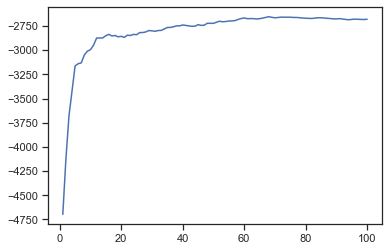

In [24]:
 print('Изменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs.cv_results_['mean_test_score'])

## GridSearch через коэффициент детерминации

Лучшая модель:

 KNeighborsRegressor(n_neighbors=84)

Лучшее число ближайших соседей:

 {'n_neighbors': 84}

Лучшее значение коэффициента детерминации:

 -0.05079004467949222

Изменение качества тестовой выборки в зависимости от кол-ва соседей:



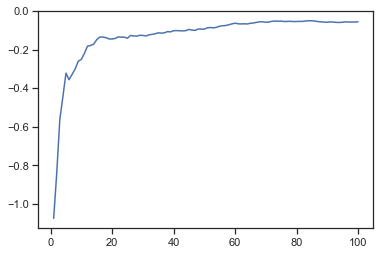

In [25]:
gs_det = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='r2') 
gs_det.fit(X_train, Y_train)
print('Лучшая модель:\n\n', gs_det.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs_det.best_params_)
print('\nЛучшее значение коэффициента детерминации:\n\n',gs_det.best_score_)
print('\nИзменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs_det.cv_results_['mean_test_score'])

## Кросс-валидация

In [26]:
from sklearn.model_selection import cross_val_score
scores_2NN = cross_val_score(KNeighborsRegressor(n_neighbors = 2), X, Y, cv=5, scoring= 'r2')
scores_5NN = cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, Y, cv=5, scoring= 'r2')
scores_10NN = cross_val_score(KNeighborsRegressor(n_neighbors = 10), X, Y, cv=5, scoring = 'r2')
scores_50NN = cross_val_score(KNeighborsRegressor(n_neighbors = 50), X, Y, cv=5, scoring = 'r2')
scores_100NN = cross_val_score(KNeighborsRegressor(n_neighbors = 100), X, Y, cv=5, scoring = 'r2')
print('Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: \n', scores_10NN, '\n\n')
print('Усредненное значение коэффициента детерминации для:\n') 
print('- 2 ближайших соседей:', np.mean(scores_2NN), '\n') 
print('- 5 ближайших соседей:', np.mean(scores_5NN), '\n') 
print('- 10 ближайших соседей:', np.mean(scores_10NN), '\n') 
print('- 50 ближайших соседей:', np.mean(scores_50NN), '\n') 
print('- 100 ближайших соседей:', np.mean(scores_100NN), '\n')

Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: 
 [-0.0506102  -0.03562861 -0.12542863 -0.19702102 -0.13125593] 


Усредненное значение коэффициента детерминации для:

- 2 ближайших соседей: -0.4874639765059384 

- 5 ближайших соседей: -0.218577828899228 

- 10 ближайших соседей: -0.10798887757070252 

- 50 ближайших соседей: -0.0151685269543679 

- 100 ближайших соседей: -0.003549322149766576 

